<a href="https://colab.research.google.com/github/maurya-anuj/Eip4/blob/master/Assign1_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


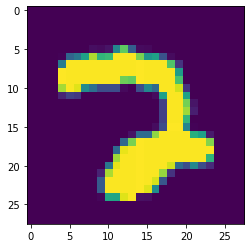

In [34]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[120])

In [35]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [37]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [39]:
Y_train[4:10]


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [50]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(100, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(60, 3, 3, activation='relu'))
#model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Convolution2D(60, 3, 3, activation='relu'))
model.add(Convolution2D(100, 3, 3, activation='relu'))
#model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 1))
model.add(Convolution2D(10, 8))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(100, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(60, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(60, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(100, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.


In [51]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 26, 26, 100)       1000      
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 24, 24, 60)        54060     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 10, 10, 60)        32460     
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 8, 8, 100)         54100     
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 8, 8, 10)          1010      
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 1, 1, 10)         

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [56]:
model.fit(X_train, Y_train, batch_size=30, nb_epoch=10, verbose=1)

Epoch 1/10
  300/60000 [..............................] - ETA: 36s - loss: 0.0047 - acc: 1.0000

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 36s 602us/step - loss: 0.0093 - acc: 0.9970
Epoch 2/10
60000/60000 [==============================] - 36s 599us/step - loss: 0.0074 - acc: 0.9976
Epoch 3/10
60000/60000 [==============================] - 36s 599us/step - loss: 0.0081 - acc: 0.9975
Epoch 4/10
60000/60000 [==============================] - 36s 599us/step - loss: 0.0093 - acc: 0.9971
Epoch 5/10
60000/60000 [==============================] - 36s 601us/step - loss: 0.0060 - acc: 0.9983
Epoch 6/10
60000/60000 [==============================] - 36s 601us/step - loss: 0.0081 - acc: 0.9977
Epoch 7/10
60000/60000 [==============================] - 36s 600us/step - loss: 0.0049 - acc: 0.9984
Epoch 8/10
60000/60000 [==============================] - 36s 599us/step - loss: 0.0072 - acc: 0.9976
Epoch 9/10
60000/60000 [==============================] - 36s 604us/step - loss: 0.0046 - acc: 0.9986
Epoch 10/10
60000/60000 [==============================] - 36s 597us/step - loss: 0.0085 - ac

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [58]:
print(score)

[0.04636482370104052, 0.9926]


In [0]:
y_pred = model.predict(X_test)

In [47]:
print(y_pred[:9])
print(y_test[:9])

[[2.17997148e-12 1.28052693e-13 4.10821930e-13 4.63034555e-10
  4.99125745e-17 5.91305772e-14 7.68939343e-20 1.00000000e+00
  1.05659381e-14 1.36760797e-10]
 [8.10248136e-12 2.32634426e-10 1.00000000e+00 2.43968908e-11
  4.96574082e-14 2.88326111e-22 4.12463656e-13 1.43129224e-15
  3.89835098e-15 7.98946209e-18]
 [4.98796338e-10 1.00000000e+00 1.56197744e-09 4.06211398e-10
  1.90166882e-09 1.60137403e-10 1.40847681e-10 6.36061426e-10
  1.68681091e-09 2.45583970e-10]
 [9.99999762e-01 4.98354025e-10 1.04606421e-10 3.29957811e-10
  3.92145994e-12 5.20492671e-09 1.18091585e-07 1.17883567e-12
  4.61867948e-08 4.08403231e-08]
 [1.22240360e-11 1.27080000e-08 5.94786590e-13 1.77225584e-13
  1.00000000e+00 5.66459152e-13 9.01585057e-11 2.78408854e-14
  4.86633400e-10 5.47921459e-08]
 [1.73773468e-10 1.00000000e+00 4.26569863e-10 5.81112805e-12
  1.78727733e-09 7.57801956e-14 1.44656769e-12 1.27938513e-08
  1.07383491e-10 3.03685618e-11]
 [2.74717640e-16 9.58082040e-08 1.74218626e-12 4.11586142e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

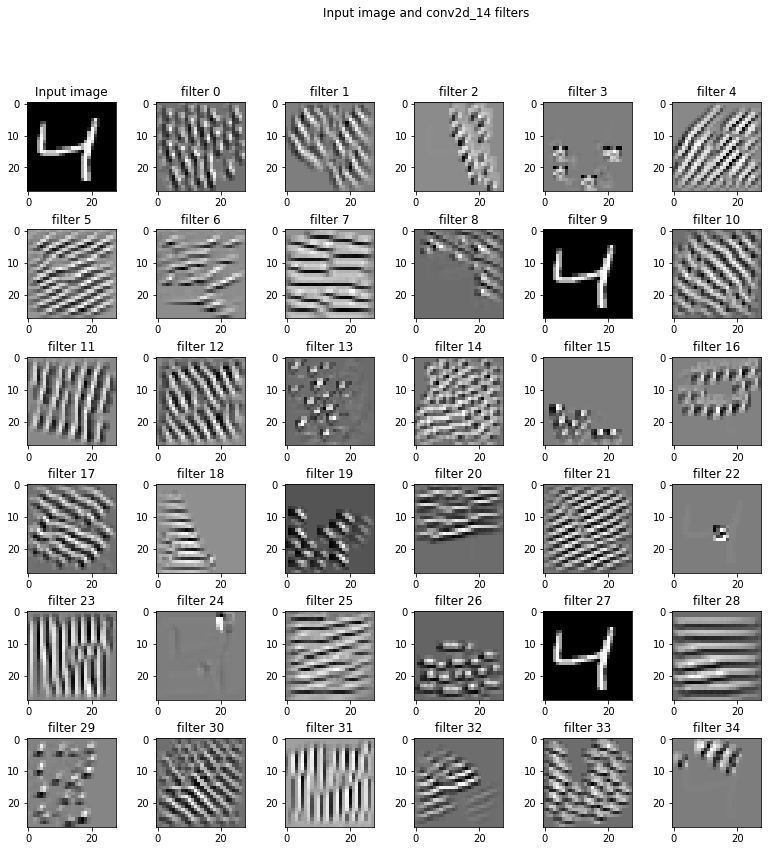

In [49]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()